# 3. Binomial and Poisson Distributions 

Even though the Poisson distribution is derived from the binomial distribution, it can better describe real experiments with photon counting than can a binomial distribution. The reason? A binomial distribution allows only two outcomes during a given time period: (1) zero photons or (2) one or more photons. The "one or more" is the issue.

There are two goals to this problem. The first goal is to demonstrate numerically that, given low $p$ and high $n$, the two distributions are nearly identical. The second goal is to demonstrate that a binomial distribution is limited.

A well-established count rate of photons from a star (from a given telescope) is 0.035/s. In one experiment, the photons from a star are counted for 100 seconds by a "perfect" CCD that is read out every 1 second (1 second accumulation). In another experiment, the experiment endures for 100 seconds but the CCD is read out every 10 seconds (10 second accumulation).


## Part (a)

Start with the binomial distribution. Write a program that calculates $P(x;n,p)$ as a function of $x$ with $n=100$ and $p=0.035$. Plot your results for $0 \le x \le 15$. Mark the mean, most likely value (mode), and standard deviation.

In [1]:
# libraries
import math
import numpy as np
import matplotlib.pyplot as plt

### Jasmine's reminder to self

**Binomial probability:**

\begin{align*}
P_B(x;n,p) &= \frac{n!}{(n-x)!x!}p^x q^{n-x}
\end{align*}

where, $q=1-p$

And other useful:

\begin{align*}
&E(x) = \mu \\
&E(x-\mu)^2 = \sigma^2
\end{align*}

where, $E(f(x)) = \sum f(x)P(x)$

In [2]:
class a_binomial:
    def __init__(self, x_min=0,x_max=15, n=100, p=0.035):
        self.x = np.arange(x_min,x_max+1,1)
        self.n = n
        self.p = p
        self.q = 1-self.p

    # function to calculate probability P(x;n,p)
    def P_binomial(self,x,n,p,q):                             
        numerator = math.factorial(n)                           # fraction numerator: n!
        denominator = math.factorial(n-x)*math.factorial(x)     # fraction denominator: (n-x)!x!
        fraction = numerator/denominator
        px = p**x                                               # p^x
        qnx = q**(n-x)                                          # q^(n-x) = (1-p)^(n-x)
        return fraction*px*qnx                                  # [n!/((n-x)!x!)]*(p^x)*(q*(n-x))

    def Expectation(self,fx,Px):
        E = sum(fx*Px)              # E(x) = sum(f(x)*P(x))
        return E
    
    def calculate_everything(self,x,Px):
        # calculate mean: mu = E(x)
        self.mu = self.Expectation(fx=self.x,Px=self.Px)   

        # calculate stand. dev: sigma = sqrt(sigma^2); sigma^2 = E(x-mu)^2
        self.sigma = np.sqrt(self.Expectation(fx=(self.x-self.mu)**2,Px=self.Px)) 

        # calculate mode: x value where P(x) is highest
        self.mode = self.x[np.argmax(self.Px)]

    
    def plot_binomial(self,title="Binomial Distribution",label="Binomial",color='black'):
        self.Px = [self.P_binomial(x= i,n=self.n,p=self.p,q=self.q) for i in self.x]
        plt.plot(self.x,self.Px, label=label,c=color)
        plt.title(title)
        plt.xlabel("x")
        plt.ylabel("P(x)")

    def plot_mark_mean(self,colors= 'green',linestyles='dashdot',label = "Mean: "):
        # mark mean in plot
        plt.vlines(self.mu,ymax=max(self.Px),ymin=0,
                   linestyles=linestyles,
                   colors=colors,
                   label=label + "$\mu$ = {0:.3f}".format(self.mu))
        plt.legend()

    def plot_mark_mode(self,colors='blue',linestyles='solid',label='Most Likely Value: '):
        # mark mode in plot
        plt.vlines(self.mode,ymax=max(self.Px),ymin=0,
                   linestyles='solid',
                   colors=colors,
                   label=label+ "mode = {0:.3f}".format(self.mode))
        plt.legend()

    def plot_mark_std(self,colors='orange',linestyles='dotted',label="Standard deviation: "):
        # mark standard deviation (wrt mean) in plot
        plt.vlines(self.mu+self.sigma,ymax=max(self.Px),ymin=0,
                   colors=colors,
                   linestyles=linestyles,
                   label=label + "$\sigma$ = {0:.3f}".format(self.sigma))
        plt.vlines(self.mu-self.sigma,
                   ymax=max(self.Px),
                   ymin=0,colors=colors,
                   linestyles=linestyles)
        plt.legend()

    def complete_ind_binomial_plot(self,title="Binomial Distribution"):
        self.plot_binomial(title=title,label=None)
        self.calculate_everything(x=self.x,Px=self.Px)
        self.plot_mark_mean()
        self.plot_mark_mode()
        self.plot_mark_std()

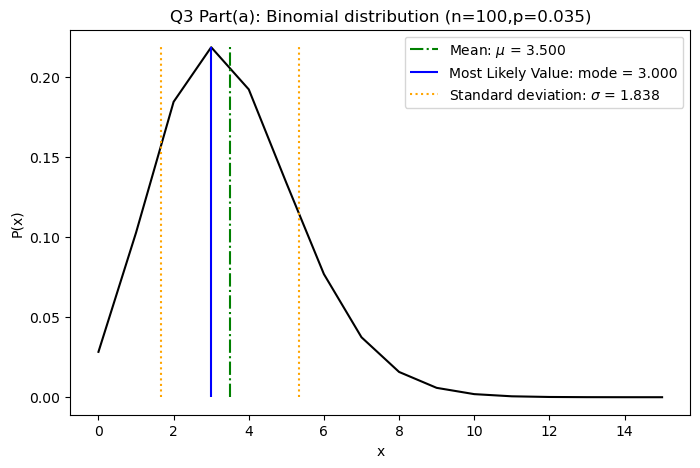

In [3]:
part_a = a_binomial(x_min=0,x_max=15,n=100,p=0.035)
plt.figure(figsize=(8,5))
part_a.complete_ind_binomial_plot(title="Q3 Part(a): Binomial distribution (n={},p={})".format(part_a.n,part_a.p))

## Part (b)

Overplot the Poisson distribution for $\lambda = \mu$; use a different color, symbol, or line style to distinguish the two. How close are the two functions? Do they have the same standard deviation?

### Jasmine's reminder to self

**Poisson probability:**

\begin{align*}
P_B(x;\lambda) &= \frac{\lambda^x}{x!}e^{-\lambda}
\end{align*}

In [4]:
class b_poisson(a_binomial):
    def __init__(self, x_min=0,x_max=15, lmd=3.5):              
        self.x = np.arange(x_min,x_max+1,1)
        self.lmd = lmd                          # the term "lambda" has its own purpose in python so I named the variable "lmd" instead

    # function to calculate probability P(x;lambda)
    def P_poisson(self,x,lmd):                             
        numerator = lmd**x                          # fraction numerator: lambda^x
        denominator = math.factorial(x)             # fraction denominator: x!
        fraction = numerator/denominator
        e_lmd = math.exp(-lmd)                      # e^(-lambda)
        return fraction*e_lmd                       # [(mu^x)/(x!)]*(e^(-lambda))
    
    def plot_poisson(self,title="Poisson Distribution",label="Poisson",color='purple'):
        self.Px = [self.P_poisson(x= i,lmd=self.lmd) for i in self.x]
        
        plt.plot(self.x,self.Px, label=label,c=color)
        plt.title(title)
        plt.xlabel("x")
        plt.ylabel("P(x)")

    def complete_ind_poisson_plot(self,title="Poisson Distribution"):
        self.plot_poisson(title=title,label=None)
        self.calculate_everything(x=self.x,Px=self.Px)
        self.plot_mark_mean()
        self.plot_mark_mode()
        self.plot_mark_std()

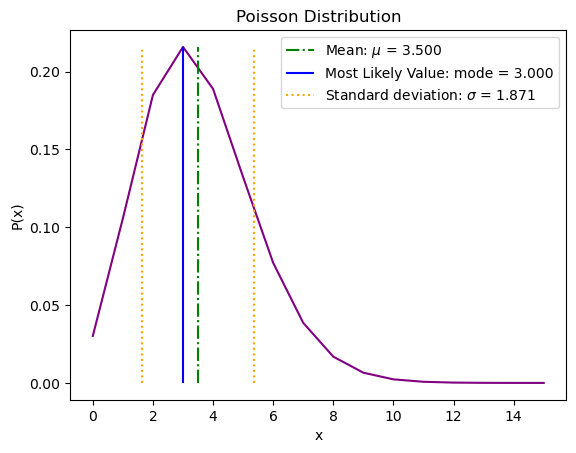

In [5]:
# individual poisson plot by itself (just to see)
part_b = b_poisson(lmd=part_a.mu)  #instantiation
part_b.complete_ind_poisson_plot()

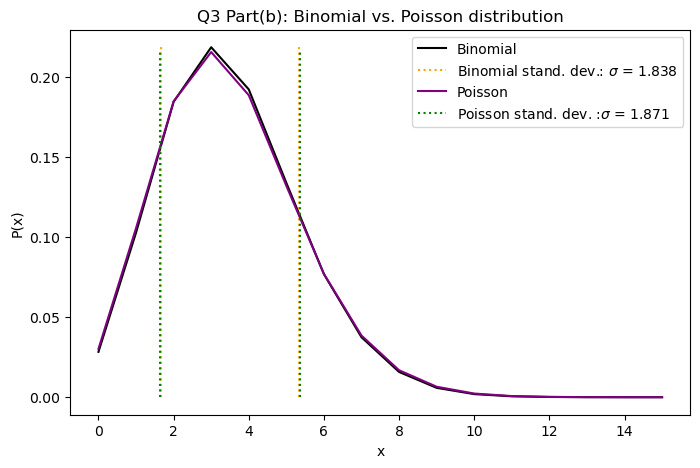

In [6]:
# comparison plot between Binomial and Poisson
plt.figure(1,figsize=(8,5))
part_a.plot_binomial(label="Binomial")
part_a.plot_mark_std(colors="orange",label="Binomial stand. dev.: ")
part_b.plot_poisson(title="Q3 Part(b): Binomial vs. Poisson distribution")
part_b.calculate_everything(x=part_b.x,Px=part_b.Px)
part_b.plot_mark_std(colors="green",label="Poisson stand. dev. :")

### Jasmine's written answer

Overall, both functions appear to be pretty close and the standard deviation for both are just about the same (only different by 0.04).

## Part (c)

Repeat **(a)** and **(b)** based on the second experiment (10 second accumulation). Here, I ask you to make a mistake. Assume $p=0.35$ and construct the binomial distribution. Plot your results. What do you conclude?

### Jasmine's note to self

So 100 seconds of 10 second accumulation means $n=10$

### Part(a) repeat with no mistake

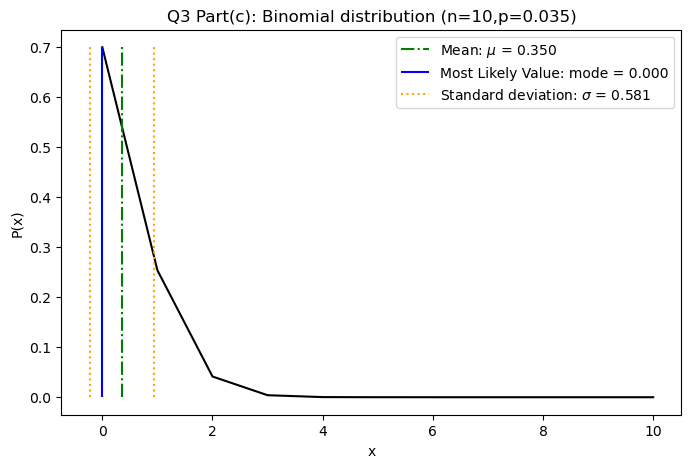

In [8]:
part_ca = a_binomial(x_max=10,n=10,p=0.035)
plt.figure(figsize=(8,5))
part_ca.complete_ind_binomial_plot(title="Q3 Part(c): Binomial distribution (n={},p={})".format(part_ca.n,part_ca.p))

### Part(b) repeat with no mistake

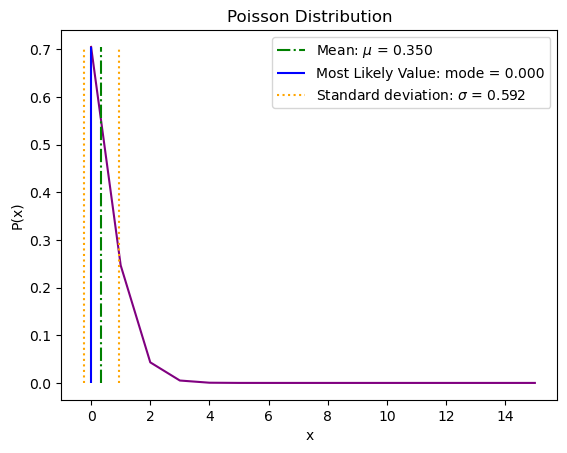

In [9]:
# individual poisson plot by itself (just to see)
part_cb = b_poisson(lmd=part_ca.mu)  #instantiation
part_cb.complete_ind_poisson_plot()

### Part(a) repeat with mistake

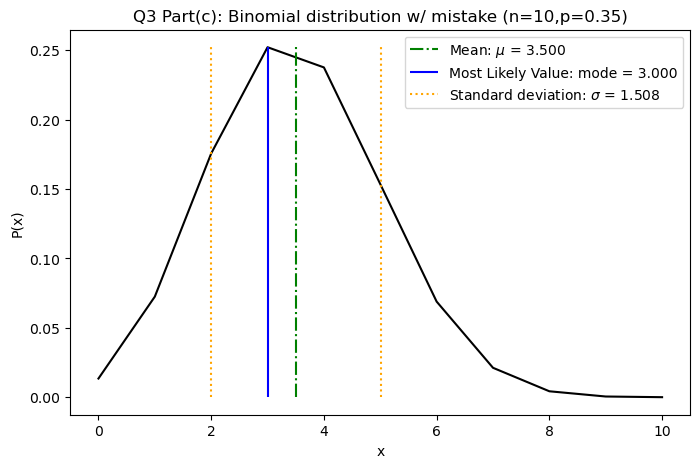

In [18]:
part_ca = a_binomial(x_max=10,n=10,p=0.35)
plt.figure(figsize=(8,5))
part_ca.complete_ind_binomial_plot(title="Q3 Part(c): Binomial distribution w/ mistake (n={},p={})".format(part_ca.n,part_ca.p))

### Part(b) repeat with mistake

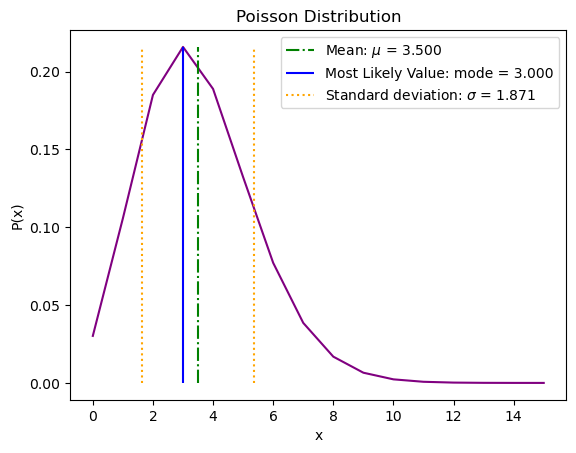

In [12]:
# individual poisson plot by itself (just to see)
part_cb = b_poisson(lmd=part_ca.mu)  #instantiation
part_cb.complete_ind_poisson_plot()

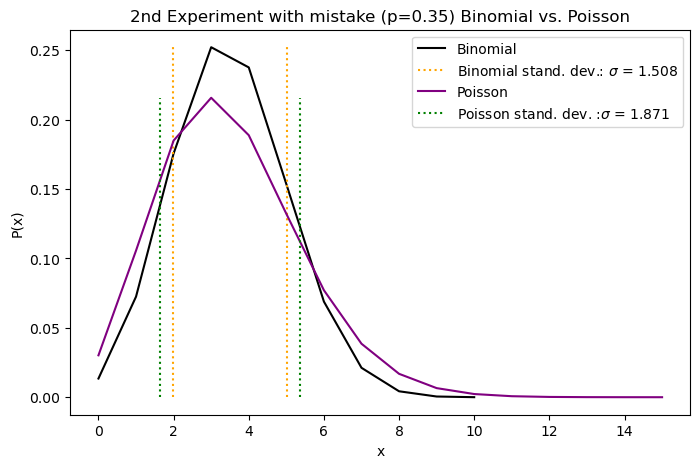

In [15]:
# comparison plot between Binomial and Poisson
plt.figure(1,figsize=(8,5))
part_ca.plot_binomial(label="Binomial")
part_ca.plot_mark_std(colors="orange",label="Binomial stand. dev.: ")
part_cb.plot_poisson(title="2nd Experiment with mistake (p={}) Binomial vs. Poisson".format(part_ca.p))
part_cb.calculate_everything(x=part_b.x,Px=part_b.Px)
part_cb.plot_mark_std(colors="green",label="Poisson stand. dev. :")

### Jasmine's written answer

(Answering the "what do you conclude" part of the question.)

This appears to be a nice example, even though we regard it as a "mistake" in this scenario, that if $p$ is not small enough Binomial and Poisson can look quite different (even though mean and mode stays the same).